# Task-1 : Stock Market Prediction
# Designed by - Abhishek Kumar Sinha





### Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import math
import matplotlib.pyplot as plt
from datetime import datetime


### Styling the graphs

In [2]:
plt.style.use('seaborn-darkgrid')
sb.set_style('whitegrid')

## Reading Data


In [3]:
# Dataset from Kaggle : https://www.kaggle.com/code/rishidamarla/stock-market-prediction-using-decision-tree/data?select=all_stocks_5yr.csv
# Reading data csv file
data = pd.read_csv("OHLC.csv")
print("Data imported successfully")

data.head(10)

Data imported successfully


,S.no,Symbol,Date,Open,High,Low,Close,Vol
0,0,ACEDBL,2012-01-01.csv,114.0,113.0,112.0,113.0,"1,962"
1,1,ACEDPO,2012-01-01.csv,188.0,114.0,114.0,114.0,"10,000"
2,2,ADBL,2012-01-01.csv,115.0,115.0,113.0,114.0,"1,111"
3,3,AHPC,2012-01-01.csv,319.0,319.0,312.0,312.0,377
4,4,ALDBL,2012-01-01.csv,102.0,101.0,101.0,101.0,30
5,5,ALICL,2012-01-01.csv,168.0,165.0,165.0,165.0,50
6,6,BLDBL,2012-01-01.csv,132.0,125.0,124.0,124.0,290
7,7,BOAN,2012-01-01.csv,160.0,168.0,159.0,168.0,"1,735"
8,8,BOK,2012-01-01.csv,415.0,435.0,407.0,435.0,"5,719"
9,9,BPCL,2012-01-01.csv,504.0,494.0,494.0,494.0,23


In [4]:
data.describe()

,S.no,Open,High,Low,Close
count,250901.000000,250901.000000,250901.000000,250901.000000,250901.000000
mean,69.281685,728.115518,738.121261,719.442406,729.287949
std,44.248010,1589.122378,1604.530323,1577.026589,1591.221102
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,169.000000,171.000000,167.000000,170.000000
50%,65.000000,350.000000,356.000000,346.000000,351.000000
75%,103.000000,755.000000,768.000000,745.000000,757.000000
max,377.000000,36000.000000,36000.000000,36000.000000,36000.000000


In [7]:
data['Date'].value_counts()

2015-06-08.csv    378
2015-02-16.csv    306
2014-06-17.csv    274
2015-08-18.csv    264
2016-01-12.csv    256
                 ... 
2012-01-19.csv     48
2012-05-02.csv     46
2012-05-16.csv     43
2013-11-10.csv     43
2015-05-24.csv     35
Name: Date, Length: 1909, dtype: int64

In [8]:
data.dtypes

NameError: name 's_data' is not defined

<AxesSubplot:>

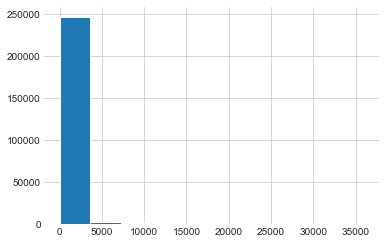

In [9]:
data['High'].hist()

<AxesSubplot:>

<Figure size 1440x576 with 0 Axes>

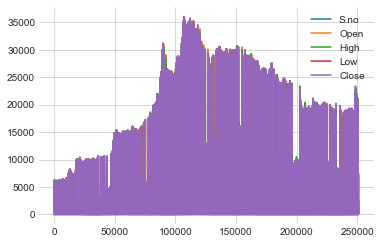

In [10]:
plt.figure(figsize=(20,8))
data.plot()

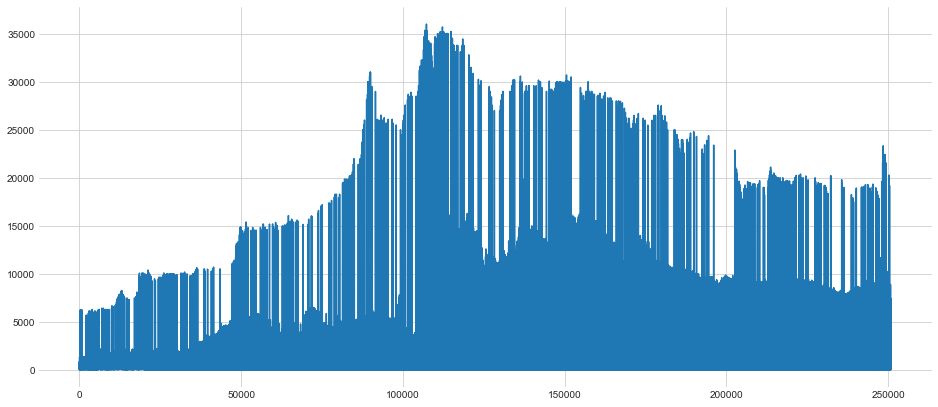

In [11]:
# Historical Graph of the closing price
plt.figure(figsize=(16, 7))
plt.plot(data['Close'])
plt.show()

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(np.array(data['Close']).reshape(-1,1))

### Splitting Dataset Into Train and Test Data

In [13]:
training_size = int(len(df)*0.75)
test_size = len(df)-training_size
train_data,test_data = df[0:training_size,:],df[training_size:len(df),:1]

In [14]:
training_size

188175

In [15]:
test_size

62726

In [16]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [17]:
X_train, Y_train = create_dataset(train_data, 100)
X_test, Y_test = create_dataset(test_data, 100)

In [18]:
print(X_train.shape), print(Y_train.shape)

(188074, 100)
(188074,)


(None, None)

In [19]:
print(X_test.shape), print(Y_test.shape)

(62625, 100)
(62625,)


(None, None)

In [20]:
# Reshaping input to [samples, time steps, features] required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [21]:
# Importing Tensorflow Module
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, Y_train, batch_size=1, epochs=1)

188074/188074 [==============================] - 9469s 50ms/step - loss: 0.0021


In [22]:
model.save('stock_prediction_model.h5')


In [23]:
# Lets predict now and check performance metrics

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

1958/1958 [==============================] - 58s 29ms/step


In [24]:
### Calculate Root Mean Squared Error

from sklearn.metrics import mean_squared_error
print("Y Train:",math.sqrt(mean_squared_error(Y_train,train_predict)))
print("Y Test:",math.sqrt(mean_squared_error(Y_test,test_predict)))

Y Train: 794.3161988173642
Y Test: 794.0381245553052
